In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations, permutations

In [2]:
points = []
points = [(2,0), (6,0), (6,2), (8,2), (8,5), (7,5), (7,7), (5,7), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2) ]


In [3]:
def makeEdges(points):
    edges = []
    for i in range(len(points)):
        edges.append([points[i], points[(i+1)%len(points)]])
    return edges

def proj(x, y, p):
    x1, y1 = x[0], x[1]
    x2, y2 = y[0], y[1]
    xp, yp = p[0], p[1]
    x12 = x2 - x1
    y12 = y2 - y1
    dotp = x12 * (xp - x1) + y12 * (yp - y1)
    dot12 = x12 * x12 + y12 * y12
    if dot12:
        coeff = dotp / dot12
        lx = x1 + x12 * coeff
        ly = y1 + y12 * coeff
        return (int(lx), int(ly))
    else:
        return False

def is_point_in_line(a, b, c, log=False):
    if (a[0] == b[0] and c[0] == a[0]):
        if (a[1] <= c[1] <= b[1]) or (a[1] >= c[1] >= b[1]):
            return True
        else:
            return False
    elif (a[1] == b[1] and c[1] == a[1]):
        if (a[0] <= c[0] <= b[0]) or (a[0] >= c[0] >= b[0]):
            return True
        else:
            return False
    return False

def is_in_same_axis(a, b):
    if (a[0] == b[0] or a[1] == b[1]):
        return True
    return False

def fallOnNoEdge(cut, edges):
    for edge in edges:
        if edge[0] == cut[0]:
            if is_point_in_line(cut[0], cut[1], edge[1]):
                return True
        elif edge[1] == cut[0]:
            if is_point_in_line(cut[0], cut[1], edge[0]):
                # print("fallOnNoEdge:", cut, edge)
                return True
        elif edge[0] == cut[1]:
            if is_point_in_line(cut[0], cut[1], edge[1]):
                # print("fallOnNoEdge:", cut, edge)
                return True
        elif edge[1] == cut[1]:
            if is_point_in_line(cut[0], cut[1], edge[0]):
                # print("fallOnNoEdge:", cut, edge)
                return True
    return False

# find the intersection of cut lines
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        return None

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return int(x), int(y)
    

In [11]:
def is_rectangle(points):    
    def isLeftTurn(a, b, c):
        if(a[1]==b[1]):
            if a[0]>b[0]:
                if b[1]<c[1]:
                    return True
                else:
                    return False
            else:
                if b[1]>c[1]:
                    return True
                else:
                    return False
        if a[0]==b[0]:
            if a[1]<b[1]:
                if b[0]<c[0]:
                    return True
                else:
                    return False
            else:
                if b[0]>c[0]:
                    return True
                else:
                    return False
    def isParallel(a, b, c):
        if a[0]==b[0] and b[0]==c[0]:
            return True
        elif a[1]==b[1] and b[1]==c[1]:
            return True
        return False

    def IsOrthogonal(a, b, c) :
        return (b[0] - a[0]) * (b[0] - c[0]) + (b[1] - a[1]) * (b[1] - c[1]) == 0
    
    def hasRectangleFlow(points, log=False):
        points = list(set(points))
        if len(points) <4 :
            return False
        
        not_reactangle = False

        should_be_left_turn = isLeftTurn(points[0], points[1], points[2])

        for index in range(len(points)-2):
            if not IsOrthogonal(points[index], points[index+1], points[index+2]) :
                if isParallel(points[index], points[index+1], points[index+2]):
                    if log:
                        print("is parallel")
                else:
                    not_reactangle = True
            if  should_be_left_turn != isLeftTurn(points[index], points[index+1], points[index+2]):
                not_reactangle = True
        return not not_reactangle

    for comb in permutations(points, 4):
        if hasRectangleFlow(comb):
            # print("on", comb)
            return comb
    return False

In [12]:
def showAsImage(new_points, cut_lines, intersections):
    img = np.zeros((10,10,3), np.uint8)
    plt.clf()
    fig = plt.figure(figsize=(10, 10))
    
    # showing outer points
    x_values = []
    y_values = []
    for index in range(len(new_points)):
        x =  new_points[index]
        if(index >= len(new_points)-1):
            y = new_points[0]
        else:
            y = new_points[index+1]
        x_values = [x[0], y[0]]
        y_values = [x[1], y[1]]
        plt.plot(x_values, y_values, color="r", marker="o", linestyle="-")

    # showing intersections of cut lines
    x_values = []
    y_values = []
    for intPoint in intersections:
        plt.plot(intPoint[0], intPoint[1], color="#fff", marker="o", linestyle="-")

    # showing cut lines
    x_values = []
    y_values = []
    for line in cut_lines:
        x_values = [line[0][0], line[1][0]]
        y_values = [line[0][1], line[1][1]]
        plt.plot(x_values, y_values, color="g", marker="", linestyle="-")

    plt.imshow(img)

[[(2, 0), (3, 0)], [(3, 0), (5, 0)], [(5, 0), (6, 0)], [(6, 0), (6, 2)], [(6, 2), (7, 2)], [(7, 2), (8, 2)], [(8, 2), (8, 5)], [(8, 5), (7, 5)], [(7, 5), (7, 7)], [(7, 7), (6, 7)], [(6, 7), (5, 7)], [(5, 7), (5, 9)], [(5, 9), (3, 9)], [(3, 9), (3, 7)], [(3, 7), (2, 7)], [(2, 7), (0, 7)], [(0, 7), (0, 5)], [(0, 5), (0, 2)], [(0, 2), (2, 2)], [(2, 2), (2, 0)]]
ints :  [(3, 2), (3, 5), (5, 2), (5, 5), (6, 5), (2, 5)]


<Figure size 432x288 with 0 Axes>

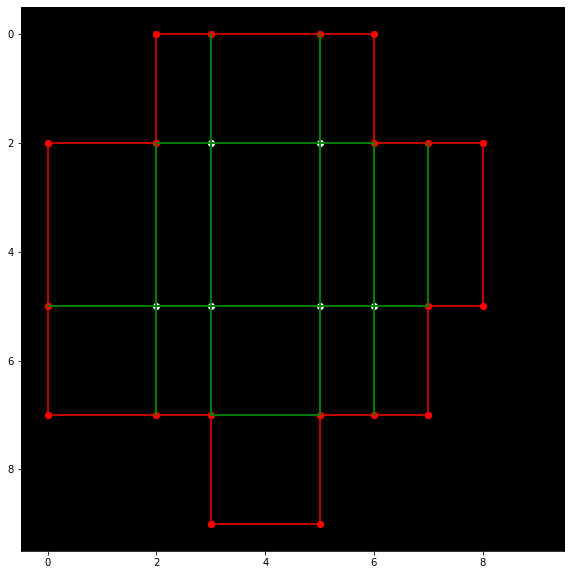

In [13]:

cut_lines = []
new_points = points
edges = makeEdges(points)
for p in points:
    for edge in edges:
        proj_point = proj(edge[0], edge[1], p)
        if is_point_in_line(edge[0], edge[1], proj_point):
            cut = [p, proj_point]
            if p != proj_point and cut not in edges and not fallOnNoEdge(cut, edges):
                if proj_point not in new_points:
                    new_points.insert(new_points.index(edge[0])+1, proj_point)
                cut_lines.append([p, proj_point])
    
intersections = []
for i in range(len(cut_lines)):
    for j in range(len(cut_lines)):
        line1 = cut_lines[i]
        line2 = cut_lines[j]
        if line1 == line2 or line1[0]==line2[0] or line1[0]==line2[1] or line1[1]==line2[0] or line1[1]==line2[1]:
            continue
        int_point = line_intersection(line1, line2)
        if int_point is not None and int_point not in intersections and int_point not in new_points:
            intersections.append(int_point)

print(edges)
print("ints : ", intersections)

showAsImage(new_points, cut_lines, intersections)

In [31]:
tmp_p = [(2,7), (2,2), (5,7), (5, 2)]
is_rectangle(tmp_p)

((2, 7), (2, 2), (5, 7), (5, 2))

In [21]:

def inSingleLine(points):
    if len(points) < 4:
        raise Exception("not enough points")
        return False
    if points[0][0] == points[1][0] == points[2][0] == points[3][0]:
        return True
    if points[0][1] == points[1][1] == points[2][1] == points[3][1]:
        return True
    return False

all_points = new_points + intersections
for comb in permutations(all_points, 4):
    # print(comb)
    # possible_combinations.append(comb)
    if inSingleLine(comb):
        continue
    rectForm = is_rectangle(comb)
    if rectForm != False:
        print ("First combination: ", comb)
        # break
# print(all_points)

First combination:  ((2, 0), (3, 0), (6, 0), (2, 2))
First combination:  ((2, 0), (3, 0), (6, 0), (2, 5))
First combination:  ((2, 0), (3, 0), (8, 2), (2, 2))
First combination:  ((2, 0), (3, 0), (7, 5), (2, 5))
First combination:  ((2, 0), (3, 0), (0, 5), (3, 5))
First combination:  ((2, 0), (3, 0), (2, 2), (6, 0))
First combination:  ((2, 0), (3, 0), (2, 2), (8, 2))
First combination:  ((2, 0), (3, 0), (2, 2), (2, 5))
First combination:  ((2, 0), (3, 0), (3, 5), (0, 5))
First combination:  ((2, 0), (3, 0), (5, 5), (2, 5))
First combination:  ((2, 0), (3, 0), (2, 5), (6, 0))
First combination:  ((2, 0), (3, 0), (2, 5), (7, 5))
First combination:  ((2, 0), (3, 0), (2, 5), (2, 2))
First combination:  ((2, 0), (3, 0), (2, 5), (5, 5))
First combination:  ((2, 0), (5, 0), (7, 5), (2, 5))
First combination:  ((2, 0), (5, 0), (5, 7), (2, 7))
First combination:  ((2, 0), (5, 0), (5, 7), (5, 2))
First combination:  ((2, 0), (5, 0), (5, 9), (2, 7))
First combination:  ((2, 0), (5, 0), (5, 9), (

KeyboardInterrupt: 

In [183]:
all_points = new_points + intersections

print loop count  1
 289/358,800 percent 0.08 % max_area:  0print loop count  2
 14,571/358,800 percent 4.06 % max_area:  7.0print loop count  3
 358,800/358,800 percent 100.0 % max_area:  14.0[[(3, 0), (5, 0), (5, 7), (3, 7)], [(2, 0), (3, 0), (3, 7), (2, 7)], [(5, 0), (6, 0), (6, 2), (5, 2)], [(6, 2), (7, 2), (7, 5), (6, 5)], [(6, 2), (6, 7), (5, 7), (5, 2)], [(7, 2), (8, 2), (8, 5), (7, 5)], [(7, 5), (7, 7), (6, 7), (6, 5)], [(5, 7), (5, 9), (3, 9), (3, 7)], [(2, 7), (0, 7), (0, 5), (2, 5)], [(0, 5), (0, 2), (2, 2), (2, 5)]]


<Figure size 432x288 with 0 Axes>

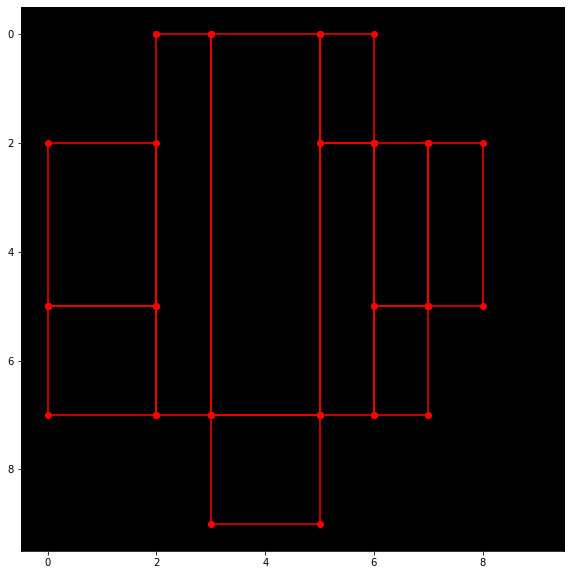

In [190]:
from shapely.geometry import Polygon

def showAllRects(rectangles):
    img = np.zeros((10,10,3), np.uint8)
    plt.clf()
    fig = plt.figure(figsize=(10, 10))

    # showing outer points
    x_values = []
    y_values = []
    break_at = 4
    i = 0
    for box in rectangles:
        i += 1
        if i > break_at:
            # break
            pass
        # draw rectangle
        x_values = [box[0][0], box[1][0], box[2][0], box[3][0], box[0][0]]
        y_values = [box[0][1], box[1][1], box[2][1], box[3][1], box[0][1]]
        plt.plot(x_values, y_values, color="r", marker="o", linestyle="-")
        # plt.imshow(img)
        # break

    plt.imshow(img)

def hasOverLap(box1, box2):
    poly1 = Polygon(box1)
    poly2 = Polygon(box2)
    return poly1.intersection(poly2).area > 0

def findRetangles(all_points, rectangles=[], max_area=0):
    # rectangles = []
    comb_count = 0
    perMutCombinations = permutations(all_points, 4)
    perMutCombinations = list(perMutCombinations)
    comb_count = len(perMutCombinations)
    comb_count_index = 0
    for comb in list(perMutCombinations):
        comb_count_index += 1
        print("\r\r", f"{comb_count_index:,}/{comb_count:,}", "percent", round(comb_count_index*100/comb_count, 2), "% max_area: ", max_area, end="")
        # print("\r\r {:n}/{:n}".format(comb_count_index, comb_count), end="")
        tmp = list(comb)
        poly = Polygon(tmp)
        # if poly is rectangle
        if poly.area == poly.minimum_rotated_rectangle.area and poly.area != 0:
            box_already_entered = False
            for b in permutations(tmp):
                b = list(b)
                if b in rectangles:
                    box_already_entered = True
                    break
            if not box_already_entered:
                # tmp is rectangle
                allowd_to_add = False
                if len(rectangles) == 0:
                    allowd_to_add = True
                    # rectangles.append(tmp)
                else:
                    has_overlap = False 
                    for rect in rectangles:
                        if hasOverLap(tmp, rect):
                            has_overlap = True
                            break
                    if not has_overlap:
                        allowd_to_add = True
                        # rectangles.append(tmp)
                if allowd_to_add:
                    if poly.area > max_area:
                        return [tmp], True, poly.area
                    rectangles.append(tmp)
                
    
    return rectangles, False, max_area
# all_points = [(0,0), (0,2), (0,4), (2,0), (2,2), (2,4), (4,0), (4,2), (4, 4)]
max_area = 8.0
foundNewMax = True
# rectangles, foundNewMax, max_area = findRetangles(all_points, max_area)
i = 0
rectangles = [[(0, 0), (0, 2), (4, 2), (4, 0)]]
max_area = 8.0
rectangles = []
max_area = 0
while foundNewMax == True:
    i += 1
    print("print loop count ", i)
    rectangles, foundNewMax, max_area = findRetangles(all_points, rectangles, max_area)
# rectangles, foundNewMax, max_area = findRetangles(all_points, rectangles, max_area)

    # print(foundNewMax)
print(rectangles)
showAllRects(rectangles)

In [186]:
rectangles

[[(5, 7), (3, 7), (3, 2), (5, 2)],
 [(2, 0), (3, 0), (3, 7), (2, 7)],
 [(3, 0), (5, 0), (5, 2), (3, 2)],
 [(5, 0), (6, 0), (6, 2), (5, 2)],
 [(6, 2), (7, 2), (7, 5), (6, 5)],
 [(6, 2), (6, 7), (5, 7), (5, 2)],
 [(7, 2), (8, 2), (8, 5), (7, 5)],
 [(7, 5), (7, 7), (6, 7), (6, 5)],
 [(5, 7), (5, 9), (3, 9), (3, 7)],
 [(2, 7), (0, 7), (0, 5), (2, 5)],
 [(0, 5), (0, 2), (2, 2), (2, 5)]]

<Figure size 432x288 with 0 Axes>

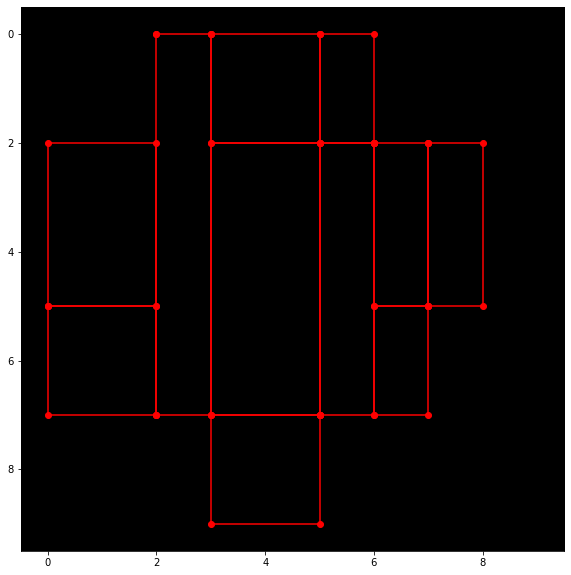

In [189]:
showAllRects(rectangles)

In [187]:
rectangles[5]

[(6, 2), (6, 7), (5, 7), (5, 2)]

In [188]:
tmp = [(6, 2), (7, 2), (8, 2), (2, 2)]
poly = Polygon(tmp)
# if poly is rectangle
poly.area 

0.0

In [95]:
rects = [[(0, 0), (0, 2), (2, 2), (2, 0)]]

tmp = [(0, 2), (2, 2), (2, 0), (0, 0)]

for b in permutations(tmp):
    print(b)
    b = list(b)
    if b in rectangles:
        print("box ", tmp, "already entered in form of ", b)
        break
    if b == [(0, 2), (2, 2), (2, 0), (0, 0)]:
        print("not entered")
        break

((0, 2), (2, 2), (2, 0), (0, 0))
not entered


In [30]:
is_rectangle([(0, 0), (0, 4), (2, 2), (2, 4)])

((0, 0), (0, 4), (2, 2), (2, 4))

In [41]:
from shapely.geometry import Polygon
p1 = Polygon([(0,0), (1,1), (1,0)])
p2 = Polygon([(0,1), (1,0), (1,1)])

p1 = Polygon([ (0,0), (0,4), (2,4), (2,0)])
p2 = Polygon([ (2, 0), (2, 4), (4, 4), (4, 0) ])


print(p1.intersects(p2), p1.intersection(p2).area)

True 0.0


In [44]:
p1.area == p1.minimum_rotated_rectangle.area

True

In [46]:
p2.area == p2.minimum_rotated_rectangle.area

True